<center>
<img src="../../img/ods_stickers.jpg">
## Open Data Science course. Session № 2
</center>
Authors: Olga Daikhovskaya, Yury Kashnitsky. The material is distributed under [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). You are free to use the material for any non-commercial purposes, mentioning the original authors is mandatory.

# <center>Homework № 7.
## <center> Unupervised learning

In this task, we will look at how data dimensionality reduction and clustering methods work. At the same time, we'll practice solving classification task again.

We will work with the [Samsung Human Activity Recognition] (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset. Download the data from there. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones ( you can find more info about the features using on the link above), the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

First we imagine that the type of activity is unknown to us, and we will try to cluster people purely on the basis of available features. Then we solve the problem of determining the type of physical activity precisely as a classification problem.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [2]:
X_train = np.loadtxt("../../data/HAPT Data Set/Train/X_train.txt")
y_train = np.loadtxt("../../data/HAPT Data Set/Train/y_train.txt").astype(int)

X_test = np.loadtxt("../../data/HAPT Data Set/Test/X_test.txt")
y_test = np.loadtxt("../../data/HAPT Data Set/Test/y_test.txt").astype(int)

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge * X_train * with * X_test *, and * y_train * with * y_test *.

In [3]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

Define the number of unique values of the labels of the target class.

In [4]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
n_classes = np.unique(y).size

[These labels correspond to:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 WALKING           
- 2 WALKING_UPSTAIRS  
- 3 WALKING_DOWNSTAIRS
- 4 SITTING           
- 5 STANDING          
- 6 LAYING            
- 7 STAND_TO_SIT      
- 8 SIT_TO_STAND      
- 9 SIT_TO_LIE        
- 10 LIE_TO_SIT        
- 11 STAND_TO_LIE      
- 12 LIE_TO_STAND  

Scale the sample using `StandardScaler` with default parameters.

In [6]:
# Your code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Reduce the number of dimensions using PCA, leaving as many components as necessary to explain at least 90% of the variance of the original (scaled) data. Use the scaled sample and fix the random_state (RANDOM_STATE constant).

In [7]:
# Your code here
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca= pca.transform(X_scaled)

** Question 1: ** <br>
What is the minimum number of main components required to cover the 90% of the variance of the original (scaled) data?

In [8]:
# Your code here
X_pca.shape

(10929, 66)

**Answer options:**
- 56 
- 65
- **66**
- 193

**Вопрос 2:**<br>
What percentage of the variance is covered by the first main component? Round to the nearest percent.

**Answer options:**
- 45
- **51**
- 56
- 61

In [9]:
# Your code here
round(float(pca.explained_variance_ratio_[0] * 100))

48

Visualize the data in the projection on the first two main components.

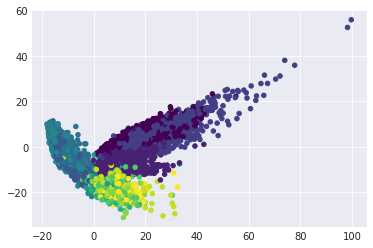

In [10]:
# Your code here
plt.scatter(X_pca [:,0], X_pca [:,1] , c=y, s=20, cmap='viridis');

**Question 3:**<br>
If everything worked out correctly, you will see a number of clusters, almost perfectly separated from each other. What types of activity are included in these clusters? <br>

**Answer options:**     
- 1 cluster: all 12 activities
- 2 clusters: 
- 3 clusters: 
- 5 clusters
- 12 clusters

**Answer: 2 cluster**

------------------------------

Run the data clustering using the `KMeans` method, training the model on data with a reduced PCA dimension. In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be searching.

Options:

- ** n_clusters ** = n_classes (number of unique labels of the target class)
- ** n_init ** = 100
- ** random_state ** = RANDOM_STATE (for the reproducibility of the result)

Other parameters should have default values.

In [11]:
# Your code here
kmeans = KMeans(n_init= 100, n_clusters=n_classes, random_state=RANDOM_STATE)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

Visualize the data in the projection on the first two main components. Color the dots according to the clusters received.

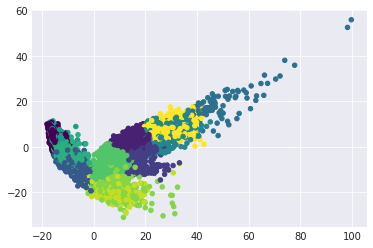

In [12]:
# Your code here
plt.scatter(X_pca [:,0], X_pca [:,1], c=cluster_labels, s=20, cmap='viridis');

Look at the correspondence between the cluster marks and the original class labels and what kinds of activities the `KMeans` algorithm is confused at.

In [13]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['WALKING', 'WALKING_UPSTAIRS',
            'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING','LAYING', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE',' LIE_TO_SIT',
             'STAND_TO_LIE','LIE_TO_STAND','all']
tab.columns = ['cluster' + str(i + 1) for i in range(12)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,all
WALKING,0,903,114,0,11,154,0,0,333,0,0,207,1722
WALKING_UPSTAIRS,0,155,359,0,0,65,0,0,946,0,0,19,1544
WALKING_DOWNSTAIRS,0,351,15,0,81,641,0,0,169,0,0,150,1407
SITTING,64,0,0,228,0,0,1047,456,6,0,0,0,1801
STANDING,0,0,0,62,0,0,953,952,12,0,0,0,1979
LAYING,1485,0,0,364,0,0,48,45,6,3,7,0,1958
STAND_TO_SIT,0,0,4,1,0,0,0,0,28,35,1,1,70
SIT_TO_STAND,0,0,0,3,0,0,0,0,3,14,13,0,33
SIT_TO_LIE,0,0,0,1,0,0,0,0,1,105,0,0,107
LIE_TO_SIT,0,0,0,4,0,0,0,0,1,1,79,0,85


We see that for each class (i.e., each activity) there are several clusters. Let's look at the maximum percentage of objects in a class that are assigned to a single cluster. This will be a simple metric that characterizes how easily the class separates from others when clustering.

Example: if for the class of "WALKING_UPSTAIRS", in which there are 1544 objects, the distribution of clusters is:
 - cluster 1 - 0
 - cluster 2 - 0
 - cluster 3 - 949
 -  ....
 - cluster 12 - 357
 
 then such a share will be 949/1544 $ \ approx $ 0.61.

**Question 4:** <br>
Which activity has been separated from the rest better than others based on the simple metric described above? <br>

**Answer:**
- 1 WALKING           
- 2 WALKING_UPSTAIRS  
- 3 WALKING_DOWNSTAIRS
- 4 SITTING           
- 5 STANDING          
- 6 LAYING            
- 7 STAND_TO_SIT      
- 8 SIT_TO_STAND      
- 9 SIT_TO_LIE        
- 10 LIE_TO_SIT        
- 11 STAND_TO_LIE      
- 12 LIE_TO_STAND  
- **there is no correct answer**

Use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

In [14]:
# Your code here
inertia = []
for k in tqdm_notebook(range(1, 12 + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, 
                    random_state=RANDOM_STATE, n_jobs=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))



We calculate $ D(k) $, as described in the lecture

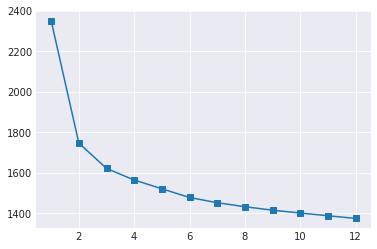

In [15]:
# Your code here
plt.plot(range(1, 13), inertia, marker='s');

In [16]:
d = {}
for k in range(2, 12):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

d

{2: 0.2073756722043588,
 3: 0.45643227224343164,
 4: 0.7578872076479074,
 5: 0.9936582044979201,
 6: 0.597271773053862,
 7: 0.7751292854694146,
 8: 0.8540572414722748,
 9: 0.8201568633428964,
 10: 0.9747371437164395,
 11: 0.9629850185325637}

**Question 5:** <br>
How many clusters can we choose according to the elbow method? <br>

**Answer options:**
- 1
- **2**
- 3
- 4
- 5
- 6
- 7 

------------------------

Let's try another method of clustering, which was described in the article - agglomerative clustering.

In [17]:
agclus = AgglomerativeClustering(n_clusters= n_classes, linkage='ward').fit(X_pca)

Calculate the Adjusted Rand Index (`sklearn.metrics`) for the resulting clustering and for ` KMeans` with the parameters from the 4th question.

In [18]:
# Your code here
print('KMeans=', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative Clustering=', metrics.adjusted_rand_score(y, agclus.labels_))

KMeans= 0.41636325701082716
Agglomerative Clustering= 0.46574365320501654


**Question 6:** <br>
Select all the correct statements. <br>

**Answer options:**
- **ARI expresses the similarity of the tags obtained after clustering, with class labels for the same sample and the higher the value of this index, the better**
- **According to ARI, KMeans handled clustering worse than Agglomerative Clustering**
- **For ARI, it does not matter which tags are assigned to the cluster, only the partitioning of objects into clusters is important**
- **In case of random partitioning into clusters ARI will be close to zero**



**Comment:**
Check ARI documentation in sklearn docs

**Answer:** All statements are correct

-------------------------------

You can notice that the task is not very well solved just as a clustering task if you select several clusters (> 2). Now, let's solve the classification problem, given that the data is marked up.

For classification, use the support vector machine - class `sklearn.svm.LinearSVC`. in this course, we did not review on this algorithm separately, but it is well-known and you can read about it, for example, in the materials of Yevgeny Sokolov - [here](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem11_linear.pdf).

Choose the `C` hyperparameter for` LinearSVC` using `GridSearchCV`.

- Train the new `StandardScaler` on the training sample (with all the original features), apply scaling to the test sample
- In `GridSearchCV`, specify cv = 3.

In [19]:
# Your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [21]:
# Your code here
best_svc = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

In [22]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9284150894811382)

**Question 7**<br>
Which value of the hyperparameter `C` was chosen the best on the basis of cross-validation? <br>

**Answer options:**
- 0.001
- 0.01
- **0.1,**
- 1
- 10

In [23]:
y_predicted = best_svc.predict(X_test_scaled)

In [24]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['WALKING', 'WALKING_UPSTAIRS',
            'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING','LAYING', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE',' LIE_TO_SIT',
             'STAND_TO_LIE','LIE_TO_STAND','all']
tab.columns = ['WALKING', 'WALKING_UPSTAIRS',
            'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING','LAYING', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE',' LIE_TO_SIT',
             'STAND_TO_LIE','LIE_TO_STAND','all']
tab

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING,STAND_TO_SIT,SIT_TO_STAND,SIT_TO_LIE,LIE_TO_SIT,STAND_TO_LIE,LIE_TO_STAND,all
WALKING,495,1,0,0,0,0,0,0,0,0,0,0,496
WALKING_UPSTAIRS,17,450,1,1,0,0,1,0,0,0,1,0,471
WALKING_DOWNSTAIRS,4,3,411,0,2,0,0,0,0,0,0,0,420
SITTING,0,4,0,439,62,2,1,0,0,0,0,0,508
STANDING,0,0,0,12,543,0,1,0,0,0,0,0,556
LAYING,0,0,0,0,8,537,0,0,0,0,0,0,545
STAND_TO_SIT,0,0,0,1,2,0,19,0,1,0,0,0,23
SIT_TO_STAND,0,0,0,0,0,0,0,10,0,0,0,0,10
SIT_TO_LIE,0,0,0,0,2,1,2,0,21,0,6,0,32
LIE_TO_SIT,0,0,0,0,0,0,0,0,0,18,0,7,25


As you can see, the classification problem is solved quite well.

**Question 8:** <br>
Does SVM confuse the classes inside the activity groups we identified earlier (in the question 3)? We consider that it is confused, if the algorithm was wrong at least in one case. <br>

**Answer options:**
- **yes**
- no


Finally, do the same thing as in Question 7, but add the PCA.

- Use the samples `X_train_scaled` and` X_test_scaled`
- Teach the same PCA as before, on a scaled training sample, apply the conversion to a test
- Choose the hyperparameter `C` with cross-validation on the training sample with PCA-transformation. You will notice how much faster it works than before.

**Question 9:** <br>
What is the difference between the best quality (the proportion of correct answers) for cross-validation in the case of all 561 initial characteristics and in the second case, when the principal component method was applied? Round to the nearest percent. <br>

**Options:**
- The quality is the same
- 2%
- **4%**
- 10%
- 20%

In [25]:
# Your code here
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

pca= PCA(n_components= 0.9, random_state= RANDOM_STATE)

X_train_pca= pca.fit_transform(X_train_scaled)
X_test_pca= pca.transform(X_test_scaled)

In [26]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params= {'C': [0.001, 0.01, 0.1, 1, 10]}

In [27]:
best_svc_pca= GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc_pca.fit(X_train_pca, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maitha/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

In [28]:
best_svc_pca.best_params_, best_svc_pca.best_score_

({'C': 0.1}, 0.8845113943607571)

In [29]:
(100 * (best_svc_pca.best_score_ - best_svc.best_score_))

-4.390369512038106

**Question 10:** <br>
Select all the correct statements:

**Answer options:**
- Principal component analysis in this case allowed to reduce the model training time, while the quality (the proportion of correct responses on cross-validation) suffered greatly, by more than 10%
- **PCA can be used to visualize data, but there are better methods for this task, for example, tSNE. But PCA has less computational complexity**
- **PCA builds linear combinations of initial characteristics that are poorly interpreted by humans**
- SVM works better than kMeans, since it clearly reduces the algorithm to the optimization problem